#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests

In [2]:
url="https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
datos = response.json()
datos_telecom = pd.DataFrame(datos)
datos_telecom.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [23]:
df_datos_telecom = pd.json_normalize(datos)
df_datos_telecom.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [24]:
df_datos_telecom.rename(columns={
    'customerID': 'ID',
    'Churn': 'abandono',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'cliente_mayor_edad',
    'customer.Partner': 'cliente_tiene_pareja',
    'customer.Dependents': 'cliente_dependientes',
    'customer.tenure': 'cliente_antiguedad',
    'phone.PhoneService': 'telefono_servicio',
    'phone.MultipleLines': 'telefono_lineas_adicionales',
    'internet.InternetService': 'internet_servicio',
    'internet.OnlineSecurity': 'internet_seguridad',
    'internet.OnlineBackup': 'internet_respaldo',
    'internet.DeviceProtection': 'internet_proteccion_dispositivo',
    'internet.TechSupport': 'internet_soporte_tecnico',
    'internet.StreamingTV': 'internet_tv',
    'internet.StreamingMovies': 'internet_peliculas',
    'account.Contract': 'contrato',
    'account.PaperlessBilling': 'cuenta_sin_papel',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cuenta_mensual',
    'account.Charges.Total': 'total'
}, inplace=True)


In [25]:
df_datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               7267 non-null   object 
 1   abandono                         7267 non-null   object 
 2   genero                           7267 non-null   object 
 3   cliente_mayor_edad               7267 non-null   int64  
 4   cliente_tiene_pareja             7267 non-null   object 
 5   cliente_dependientes             7267 non-null   object 
 6   cliente_antiguedad               7267 non-null   int64  
 7   telefono_servicio                7267 non-null   object 
 8   telefono_lineas_adicionales      7267 non-null   object 
 9   internet_servicio                7267 non-null   object 
 10  internet_seguridad               7267 non-null   object 
 11  internet_respaldo                7267 non-null   object 
 12  internet_proteccion_

In [26]:
for col in df_datos_telecom.columns:
  print(f"valores únicos en la columna'{col}': {df_datos_telecom[col].nunique()}")
  print(df_datos_telecom[col].unique())
  print('-' * 30)

valores únicos en la columna'ID': 7267
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
valores únicos en la columna'abandono': 3
['No' 'Yes' '']
------------------------------
valores únicos en la columna'genero': 2
['Female' 'Male']
------------------------------
valores únicos en la columna'cliente_mayor_edad': 2
[0 1]
------------------------------
valores únicos en la columna'cliente_tiene_pareja': 2
['Yes' 'No']
------------------------------
valores únicos en la columna'cliente_dependientes': 2
['Yes' 'No']
------------------------------
valores únicos en la columna'cliente_antiguedad': 73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
valores únicos en la columna'telefono_servicio': 2
['Yes' 'No']
----------

In [27]:
print(df_datos_telecom.isnull().sum())

ID                                 0
abandono                           0
genero                             0
cliente_mayor_edad                 0
cliente_tiene_pareja               0
cliente_dependientes               0
cliente_antiguedad                 0
telefono_servicio                  0
telefono_lineas_adicionales        0
internet_servicio                  0
internet_seguridad                 0
internet_respaldo                  0
internet_proteccion_dispositivo    0
internet_soporte_tecnico           0
internet_tv                        0
internet_peliculas                 0
contrato                           0
cuenta_sin_papel                   0
metodo_pago                        0
cuenta_mensual                     0
total                              0
dtype: int64


In [28]:
print("\nDuplicados:", df_datos_telecom.duplicated().sum())



Duplicados: 0


In [29]:
print("\nValores Unicos:\n")
df_datos_telecom.nunique()


Valores Unicos:



,0
ID,7267
abandono,3
genero,2
cliente_mayor_edad,2
cliente_tiene_pareja,2
cliente_dependientes,2
cliente_antiguedad,73
telefono_servicio,2
telefono_lineas_adicionales,3
internet_servicio,3


In [30]:
df_datos_telecom.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
ID,0
abandono,224
genero,0
cliente_mayor_edad,0
cliente_tiene_pareja,0
cliente_dependientes,0
cliente_antiguedad,0
telefono_servicio,0
telefono_lineas_adicionales,0
internet_servicio,0


In [31]:
#Convertir columna a numérico y eliminar filas inválidas
df_datos_telecom['total'] = pd.to_numeric(df_datos_telecom['total'], errors='coerce')
df_datos_telecom = df_datos_telecom.dropna(subset=['total'])

#Limpiar
df_datos_telecom = df_datos_telecom[df_datos_telecom['abandono'].notna() & (df_datos_telecom['abandono'].str.strip() != '')]
empty_counts = (df_datos_telecom.astype(str).apply(lambda col: col.str.strip().eq(''))).sum()
print("Valores vacíos:\n", empty_counts)

Valores vacíos:
 ID                                 0
abandono                           0
genero                             0
cliente_mayor_edad                 0
cliente_tiene_pareja               0
cliente_dependientes               0
cliente_antiguedad                 0
telefono_servicio                  0
telefono_lineas_adicionales        0
internet_servicio                  0
internet_seguridad                 0
internet_respaldo                  0
internet_proteccion_dispositivo    0
internet_soporte_tecnico           0
internet_tv                        0
internet_peliculas                 0
contrato                           0
cuenta_sin_papel                   0
metodo_pago                        0
cuenta_mensual                     0
total                              0
dtype: int64


In [32]:
#Valores de tipo texto
for col in df_datos_telecom.columns:
    if df_datos_telecom[col].dtype == "object":
        print(col, df_datos_telecom[col].unique()[:10])

ID ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
abandono ['No' 'Yes']
genero ['Female' 'Male']
cliente_tiene_pareja ['Yes' 'No']
cliente_dependientes ['Yes' 'No']
telefono_servicio ['Yes' 'No']
telefono_lineas_adicionales ['No' 'Yes' 'No phone service']
internet_servicio ['DSL' 'Fiber optic' 'No']
internet_seguridad ['No' 'Yes' 'No internet service']
internet_respaldo ['Yes' 'No' 'No internet service']
internet_proteccion_dispositivo ['No' 'Yes' 'No internet service']
internet_soporte_tecnico ['Yes' 'No' 'No internet service']
internet_tv ['Yes' 'No' 'No internet service']
internet_peliculas ['No' 'Yes' 'No internet service']
contrato ['One year' 'Month-to-month' 'Two year']
cuenta_sin_papel ['Yes' 'No']
metodo_pago ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [33]:
#Normalizar valores antes de convertir
df_datos_telecom = df_datos_telecom.replace({
    "No internet service": "No",
    "No phone service": "No",
    "": "No"   # para los casos vacíos en abandono
})

# Definir columnas binarias
yes_no_cols = [
    "abandono", "cliente_tiene_pareja", "cliente_dependientes",
    "telefono_servicio", "telefono_lineas_adicionales",
    "internet_seguridad", "internet_respaldo",
    "internet_proteccion_dispositivo", "internet_soporte_tecnico",
    "internet_tv", "internet_peliculas", "cuenta_sin_papel"
]

# Convertir a 0 y 1
for col in yes_no_cols:
    df_datos_telecom[col] = df_datos_telecom[col].map({"Yes": 1, "No": 0})

df_datos_telecom

,ID,abandono,genero,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_servicio,...,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,contrato,cuenta_sin_papel,metodo_pago,cuenta_mensual,total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [34]:
df_datos_telecom.describe()

,abandono,cliente_mayor_edad,cliente_tiene_pareja,cliente_dependientes,cliente_antiguedad,telefono_servicio,telefono_lineas_adicionales,internet_seguridad,internet_respaldo,internet_proteccion_dispositivo,internet_soporte_tecnico,internet_tv,internet_peliculas,cuenta_sin_papel,cuenta_mensual,total
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


#📊 Carga y análisis

In [35]:
#Columna cuentas_diarias
df_datos_telecom["cuentas_diarias"]=df_datos_telecom["cuenta_mensual"]/30
df_datos_telecom.sample(5)[['cuenta_mensual','cuentas_diarias']]

,cuenta_mensual,cuentas_diarias
376,20.50,0.683333
4678,83.80,2.793333
2057,80.80,2.693333
3889,79.15,2.638333
6611,105.30,3.510000


In [38]:
#resumen general de todas las columnas
resumen = df_datos_telecom.describe().T
resumen["mediana"] = df_datos_telecom.median(numeric_only=True)
resumen["varianza"] = df_datos_telecom.var(numeric_only=True)
resumen["desviacion_std"] = df_datos_telecom.std(numeric_only=True)

print("Análisis Descriptivo General:")
print(resumen)


Análisis Descriptivo General:
                                  count         mean          std        min  \
abandono                         7032.0     0.265785     0.441782   0.000000   
cliente_mayor_edad               7032.0     0.162400     0.368844   0.000000   
cliente_tiene_pareja             7032.0     0.482509     0.499729   0.000000   
cliente_dependientes             7032.0     0.298493     0.457629   0.000000   
cliente_antiguedad               7032.0    32.421786    24.545260   1.000000   
telefono_servicio                7032.0     0.903299     0.295571   0.000000   
telefono_lineas_adicionales      7032.0     0.421928     0.493902   0.000000   
internet_seguridad               7032.0     0.286547     0.452180   0.000000   
internet_respaldo                7032.0     0.344852     0.475354   0.000000   
internet_proteccion_dispositivo  7032.0     0.343857     0.475028   0.000000   
internet_soporte_tecnico         7032.0     0.290102     0.453842   0.000000   
internet_t

In [39]:
#Gasto mensual
print("\nDistribución del gasto mensual (cuenta_mensual):")
print("Media:", df_datos_telecom["cuenta_mensual"].mean())
print("Mediana:", df_datos_telecom["cuenta_mensual"].median())
print("Desviación estándar:", df_datos_telecom["cuenta_mensual"].std())
print("Valor mínimo:", df_datos_telecom["cuenta_mensual"].min())
print("Valor máximo:", df_datos_telecom["cuenta_mensual"].max())



Distribución del gasto mensual (cuenta_mensual):
Media: 64.79820819112628
Mediana: 70.35
Desviación estándar: 30.085973884049906
Valor mínimo: 18.25
Valor máximo: 118.75


In [40]:
#Gasto total
print("\nDistribución del gasto total (total):")
print("Media:", df_datos_telecom["total"].mean())
print("Mediana:", df_datos_telecom["total"].median())
print("Desviación estándar:", df_datos_telecom["total"].std())
print("Valor mínimo:", df_datos_telecom["total"].min())
print("Valor máximo:", df_datos_telecom["total"].max())



Distribución del gasto total (total):
Media: 2283.3004408418656
Mediana: 1397.475
Desviación estándar: 2266.771361883145
Valor mínimo: 18.8
Valor máximo: 8684.8


In [41]:
#Antiguedad de los clientes
print("\nAntigüedad de los clientes (meses):")
print("Media:", df_datos_telecom["cliente_antiguedad"].mean())
print("Mediana:", df_datos_telecom["cliente_antiguedad"].median())
print("Desviación estándar:", df_datos_telecom["cliente_antiguedad"].std())
print("Valor mínimo:", df_datos_telecom["cliente_antiguedad"].min())
print("Valor máximo:", df_datos_telecom["cliente_antiguedad"].max())



Antigüedad de los clientes (meses):
Media: 32.421786120591584
Mediana: 29.0
Desviación estándar: 24.54525970926324
Valor mínimo: 1
Valor máximo: 72


In [42]:
#Abandono
abandono_counts = df_datos_telecom["abandono"].value_counts(normalize=True) * 100
print("\nTasa de abandono de clientes:")
print(abandono_counts)


Tasa de abandono de clientes:
abandono
0    73.421502
1    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-722473377.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


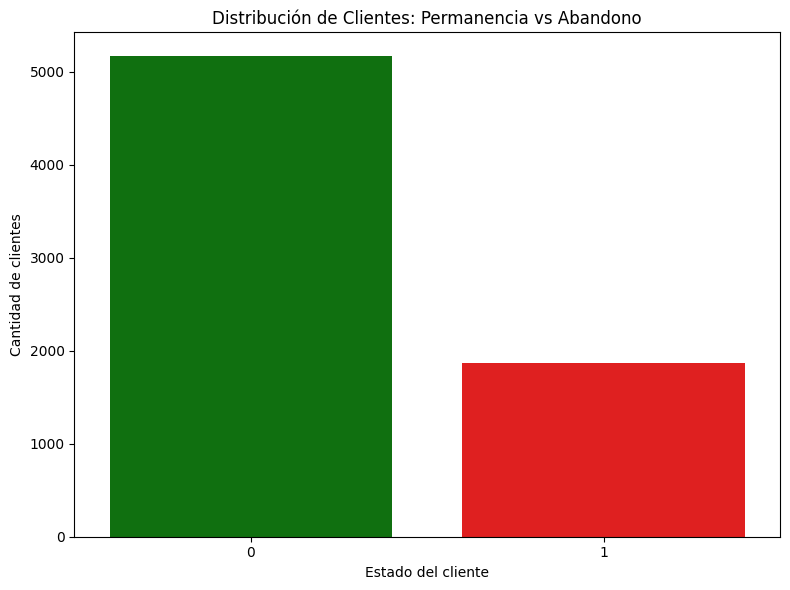

In [44]:
#Permanencia  vs abandono
abandono_counts = df_datos_telecom['abandono'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(
    x=abandono_counts.index,
    y=abandono_counts.values,
    palette=['green', 'red']
)
plt.title("Distribución de Clientes: Permanencia vs Abandono")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Estado del cliente")
plt.tight_layout()
plt.savefig("distribucion_permanencia_vs_abandono_barra.png")
plt.show()

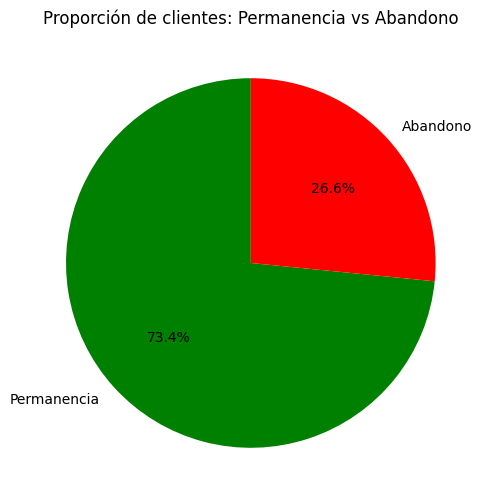

In [47]:
abandono_counts = df_datos_telecom["abandono"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(abandono_counts, labels=["Permanencia", "Abandono"], autopct="%1.1f%%", startangle=90, colors=['green', 'red'])
plt.title("Proporción de clientes: Permanencia vs Abandono")
plt.show()

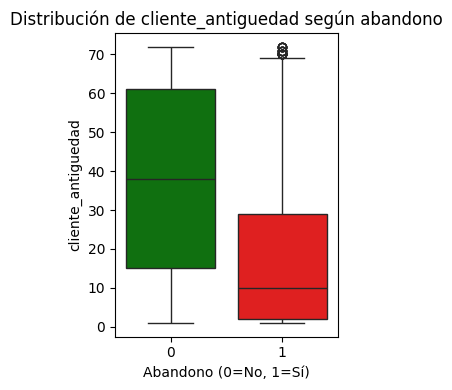

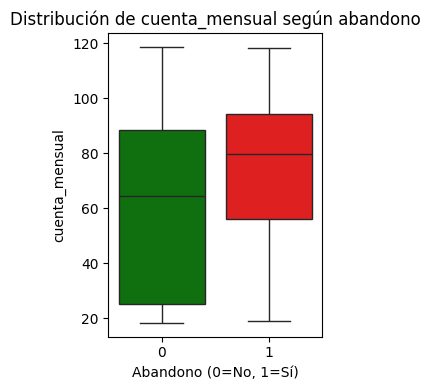

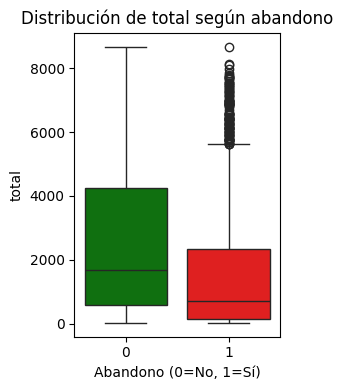

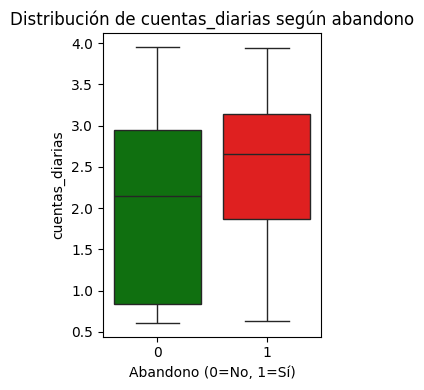

In [46]:
variables_numericas = ['cliente_antiguedad', 'cuenta_mensual', 'total', 'cuentas_diarias']

for var in variables_numericas:
    plt.figure(figsize=(3,4))
    sns.boxplot(
        x='abandono',
        y=var,
        hue='abandono',
        data=df_datos_telecom,
        palette=['green', 'red'],
        legend=False
    )
    plt.title(f"Distribución de {var} según abandono")
    plt.xlabel("Abandono (0=No, 1=Sí)")
    plt.ylabel(var)
    plt.tight_layout()
    plt.savefig(f"{var}_por_abandono.png")
    plt.show()

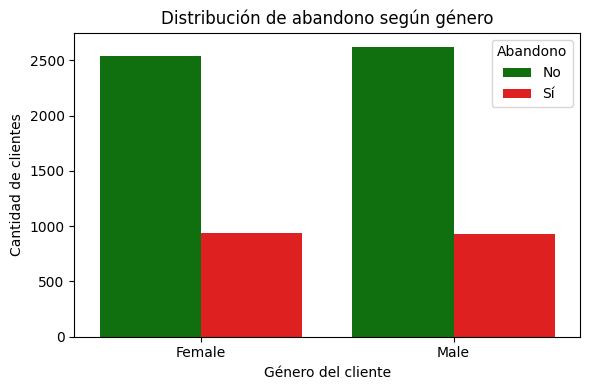

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x='genero', hue='abandono', data=df_datos_telecom,
              palette=['green', 'red'])
plt.title("Distribución de abandono según género")
plt.xlabel("Género del cliente")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Abandono", labels=["No", "Sí"])
plt.tight_layout()
plt.savefig("abandono_vs_genero.png")
plt.show()

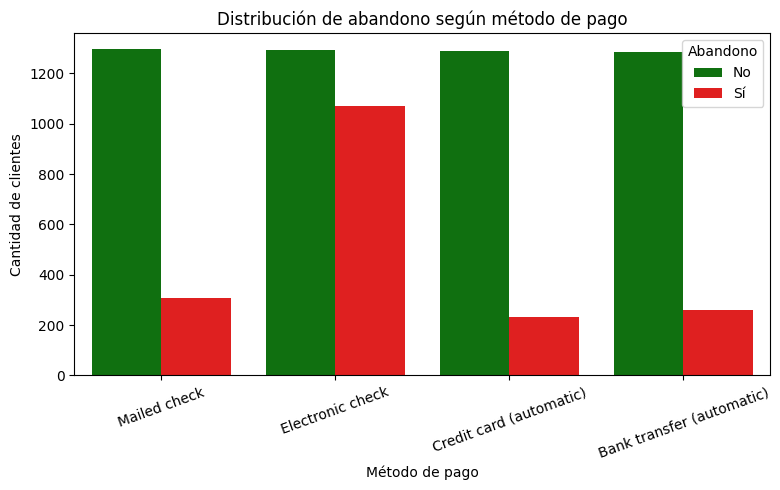

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='metodo_pago', hue='abandono', data=df_datos_telecom,
              palette=['green', 'red'])
plt.title("Distribución de abandono según método de pago")
plt.xlabel("Método de pago")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=20)  # para que no se encimen las etiquetas
plt.legend(title="Abandono", labels=["No", "Sí"])
plt.tight_layout()
plt.savefig("abandono_vs_metodo_pago.png")
plt.show()

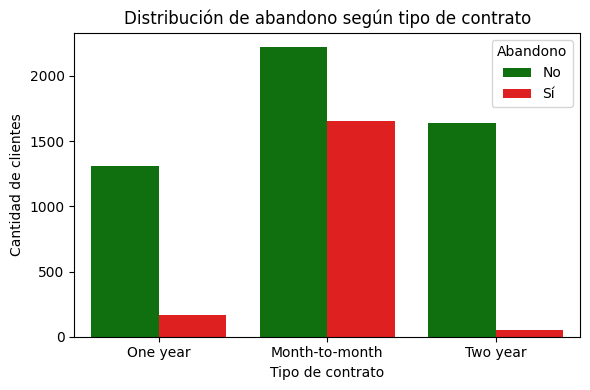

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='contrato', hue='abandono', data=df_datos_telecom,
              palette=['green', 'red'])
plt.title("Distribución de abandono según tipo de contrato")
plt.xlabel("Tipo de contrato")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Abandono", labels=["No", "Sí"])
plt.tight_layout()
plt.show()

#📄Informe final

El análisis busca entender el comportamiento de evasión de clientes (churn) en una empresa de telecomunicaciones, fenómeno que afecta directamente la rentabilidad, dado que retener clientes existentes es más económico que adquirir nuevos. El estudio identifica patrones y factores asociados con la permanencia o abandono de los clientes, con el objetivo de orientar estrategias que reduzcan la tasa de churn y mejoren la retención.

En el conjunto de datos, el 26.6% de los clientes abandonaron el servicio mientras que el 73.4% se mantuvo activo, evidenciando un desafío importante de retención. Para obtener estos resultados se realizaron varias tareas de limpieza y tratamiento de datos: se imputaron valores nulos en variables numéricas con la mediana, se transformaron variables categóricas tipo “Sí/No” a binario, se reemplazaron valores faltantes en variables financieras por 0 y se ajustaron tipos de datos para garantizar un análisis correcto de las variables numéricas.



/tmp/ipython-input-1537345701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


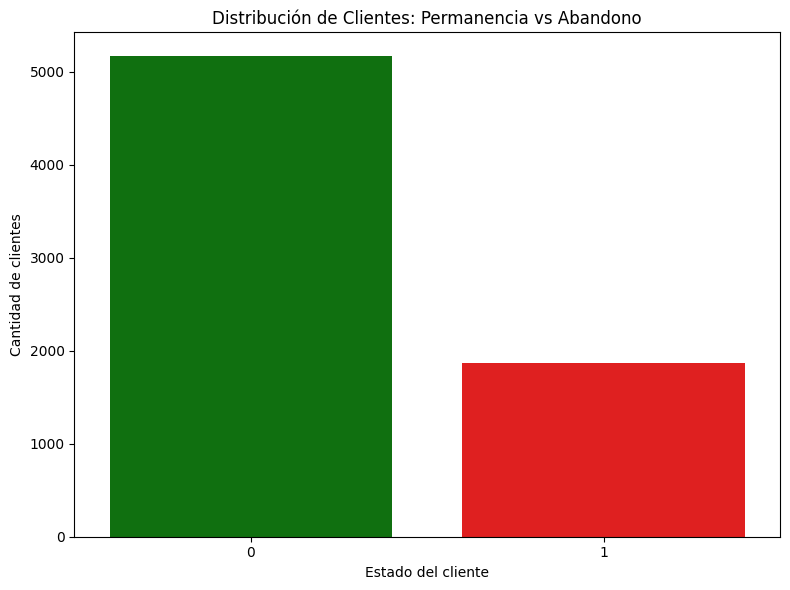

In [51]:
abandono_counts = df_datos_telecom['abandono'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(
    x=abandono_counts.index,
    y=abandono_counts.values,
    palette=['green', 'red']
)
plt.title("Distribución de Clientes: Permanencia vs Abandono")
plt.ylabel("Cantidad de clientes")
plt.xlabel("Estado del cliente")
plt.tight_layout()
plt.savefig("distribucion_permanencia_vs_abandono_barra.png")
plt.show()

Los clientes que utilizan Electronic Check presentan una tasa de abandono significativamente mayor (45%) en comparación con quienes pagan mediante métodos automáticos como tarjeta de crédito (15%) o transferencia bancaria (17%), lo que sugiere que la incomodidad o la falta de fidelización automática asociada a este método lo convierte en un predictor clave del churn. En consecuencia, los métodos automáticos facilitan la retención y se recomienda desincentivar el uso de Electronic Check o complementarlo con estrategias específicas de fidelización para reducir el riesgo de abandono.

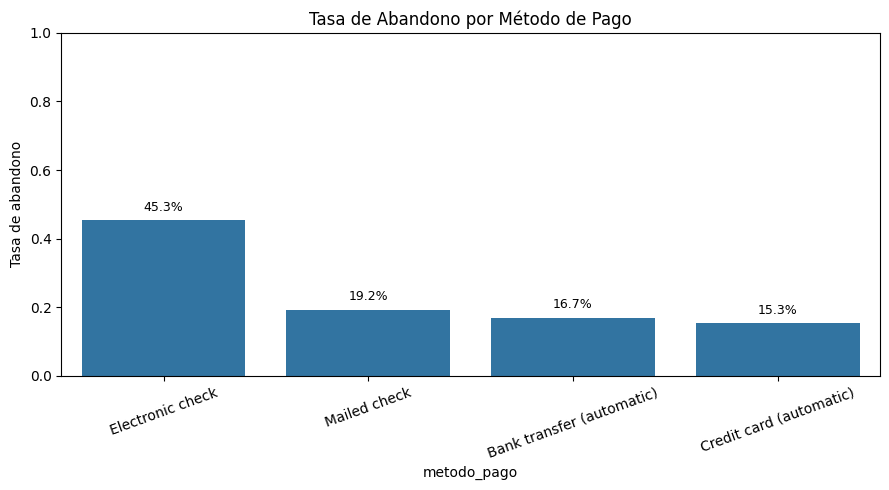

In [67]:
df = df_datos_telecom.copy()
col_abandono = 'abandono'
col_pago = 'metodo_pago'

df[col_abandono] = pd.to_numeric(df[col_abandono], errors='coerce').fillna(0).astype(int)

#Calcular tasa de abandono por método de pago
tmp = (df.groupby(col_pago)[col_abandono]
         .agg(['mean'])
         .rename(columns={'mean':'churn_rate'})
         .reset_index()
         .sort_values('churn_rate', ascending=False))

plt.figure(figsize=(9,5))
ax = sns.barplot(data=tmp, x=col_pago, y='churn_rate' , order=tmp[col_pago])
plt.title("Tasa de Abandono por Método de Pago")
plt.ylabel("Tasa de abandono")
plt.ylim(0, 1)
plt.xticks(rotation=20)

#porcentaje encima de cada barra
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0,5), textcoords='offset points')

plt.tight_layout()
plt.show()

La tasa de abandono por rango de antigüedad muestra que el 53% de los clientes con 0–6 meses de relación dejan el servicio, y esta tasa disminuye progresivamente hasta apenas 6.6% en clientes con más de cinco años. Esto evidencia un período crítico de onboarding: retener a los clientes durante los primeros meses incrementa significativamente la probabilidad de permanencia a largo plazo.

/tmp/ipython-input-2717412521.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.groupby('_tenure_bin')[col_abandono].mean().reset_index().rename(columns={col_abandono:'churn_rate'})


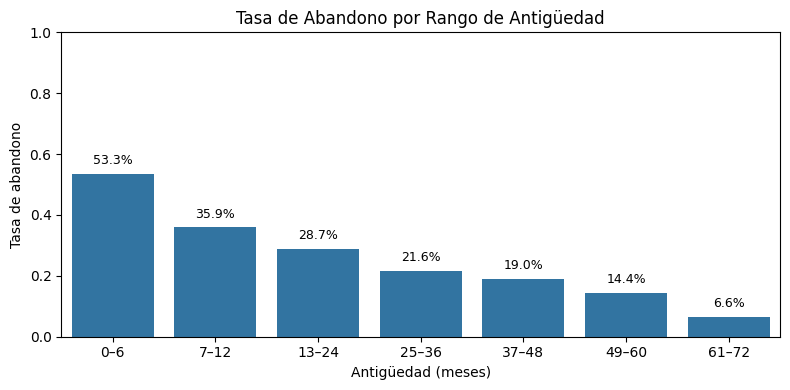

In [66]:
col_abandono = 'abandono'
col_tenure  = 'cliente_antiguedad'
bins = [0, 6, 12, 24, 36, 48, 60, 72]
labels = ["0–6", "7–12", "13–24", "25–36", "37–48", "49–60", "61–72"]
df['_tenure_bin'] = pd.cut(df[col_tenure], bins=bins, labels=labels, include_lowest=True)

# Calcular tasa de abandono por bin
tmp = df.groupby('_tenure_bin')[col_abandono].mean().reset_index().rename(columns={col_abandono:'churn_rate'})

#Gráfico
plt.figure(figsize=(8,4))
ax = sns.barplot(data=tmp, x='_tenure_bin', y='churn_rate', order=labels)
ax.set_title("Tasa de Abandono por Rango de Antigüedad")
ax.set_xlabel("Antigüedad (meses)")
ax.set_ylabel("Tasa de abandono")
ax.set_ylim(0, 1)

#Anotar porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0,5), textcoords='offset points')

plt.tight_layout()
plt.show()

Por otro lado, los clientes que abandonan suelen acumular menor gasto total que los que permanecen, lo que indica que la deserción ocurre en etapas tempranas antes de generar valor significativo para la empresa. Además, aquellos con cargos mensuales más altos presentan mayor probabilidad de abandono, especialmente alrededor de los $70–80, reflejando sensibilidad al costo y fricción asociada a precios elevados.

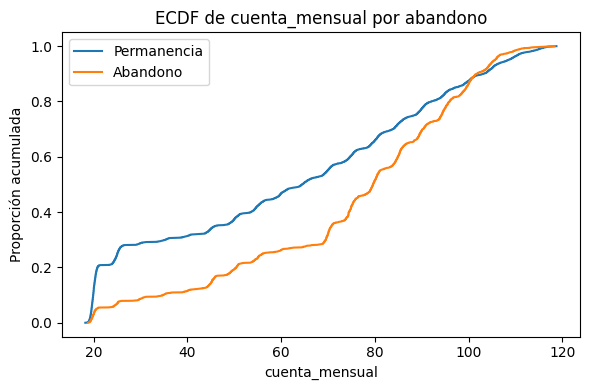

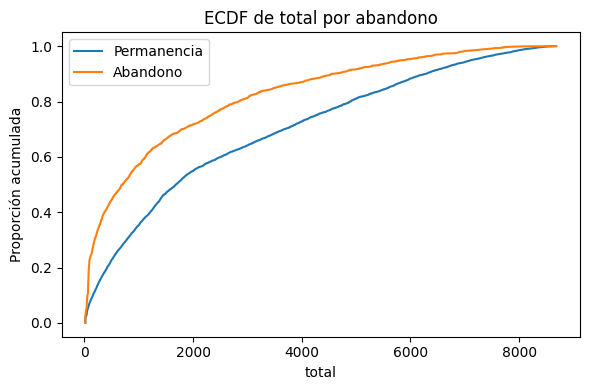

In [69]:
def ecdf(s):
    x = np.sort(s.dropna())
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

# Variables a graficar
for var in ['cuenta_mensual', 'total']:
    if var in df.columns:
        plt.figure(figsize=(6,4))
        for g, label in [(0, "Permanencia"), (1, "Abandono")]:
            x, y = ecdf(df.loc[df[col_abandono]==g, var])
            plt.plot(x, y, label=label)
        plt.title(f"ECDF de {var} por abandono")
        plt.xlabel(var)
        plt.ylabel("Proporción acumulada")
        plt.legend()
        plt.tight_layout()
        plt.show()

La tasa de abandono global es del 26.6%, indicando que aproximadamente uno de cada cuatro clientes deja el servicio. El churn se concentra en clientes de corta antigüedad (0–6 meses), especialmente aquellos con contrato mensual y que utilizan Electronic Check como método de pago. Los clientes con mayor permanencia muestran fidelidad, mientras que los cargos mensuales altos aumentan la probabilidad de abandono, reflejando sensibilidad al precio. Asimismo, quienes tienen bajo gasto total tienden a irse temprano, mientras que los contratos largos y los pagos automáticos se asocian con menor churn, evidenciando mayor estabilidad y compromiso.

Para reducir la deserción, se recomienda incentivar los pagos automáticos con beneficios, disminuir la dependencia de Electronic Check y crear programas de bienvenida y fidelización durante los primeros tres meses. También conviene ofrecer paquetes flexibles para clientes con cargos altos, comunicar claramente el valor de los servicios premium y diseñar planes con descuentos para migrar de contratos mensuales a anuales o bianuales. Además, implementar un modelo predictivo de churn y segmentar clientes según antigüedad, método de pago y cargos permitirá diseñar campañas específicas de retención.